In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
os.chdir("/capstor/scratch/cscs/ajayaraj/qtpyt-tests/pentadienyl/")

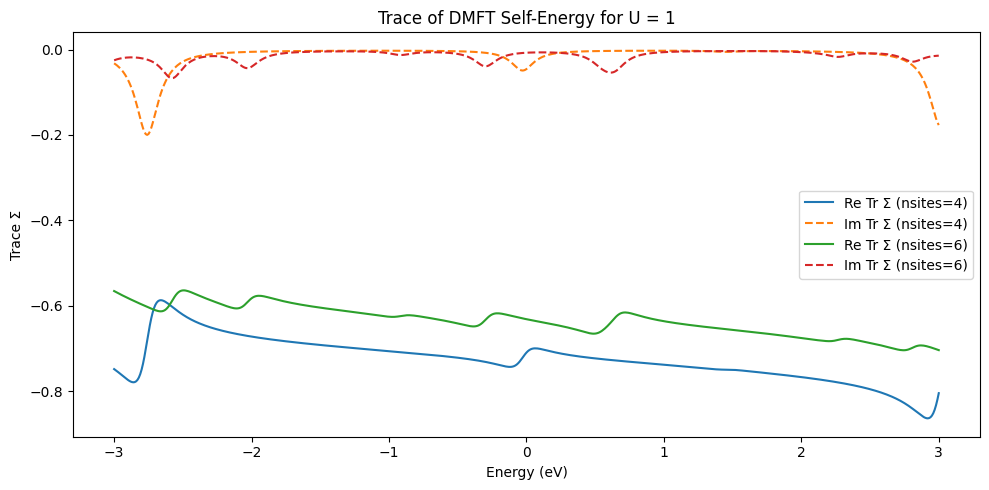

In [12]:
import numpy as np
import matplotlib.pyplot as plt

nsites_list = [4, 6]
U_list = [1]
de = 0.01
mu = 0.0
eta=1e-1
energies = np.arange(-3, 3 + de / 2.0, de).round(7)

for U in U_list:
    plt.figure(figsize=(10, 5))

    for nsites in nsites_list:
        file = f"output/lowdin/beta_1000/dmft/no_spin/fix_mu_{mu}/eta_{eta}/nsites_{nsites}/U_{U}/dmft_sigma.npy"
        sigma = np.load(file)
        trace = np.trace(sigma, axis1=-2, axis2=-1)

        plt.plot(energies, trace.real, label=f'Re Tr Σ (nsites={nsites})')
        plt.plot(energies, trace.imag, '--', label=f'Im Tr Σ (nsites={nsites})')

    plt.xlabel('Energy (eV)')
    plt.ylabel('Trace Σ')
    plt.title(f'Trace of DMFT Self-Energy for U = {U}')
    plt.legend()
    plt.tight_layout()
    plt.show()


gfloc shape: (7, 601)
gfloc shape: (7, 601)


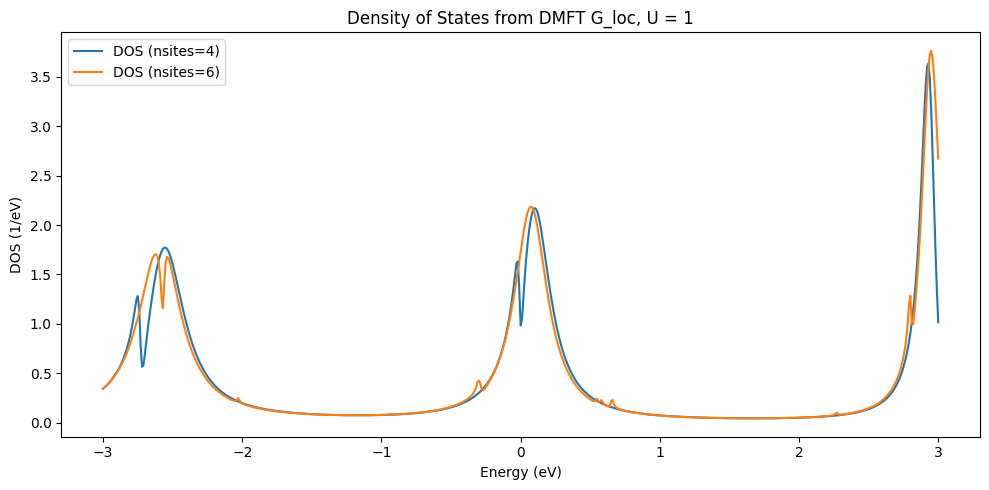

In [ ]:
for U in U_list:
    plt.figure(figsize=(10, 5))

    for nsites in nsites_list:
        file = f"output/lowdin/beta_1000/dmft/no_spin/nsites_{nsites}/U_{U}/dmft_gfloc.npy"
        gfloc = np.load(file)
        trace = np.sum(gfloc, axis=0)
        dos = -trace.imag / np.pi

        plt.plot(energies, dos, label=f'DOS (nsites={nsites})')

    plt.xlabel('Energy (eV)')
    plt.ylabel('DOS (1/eV)')
    plt.title(f'Density of States from DMFT G_loc, U = {U}')
    plt.legend()
    plt.tight_layout()
    plt.show()
